# Week3 - Homework

Write a rule based predictor for a given matrix

* Don't use a machine learning model (You can use PCA)

In [11]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/iris.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
df.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

#Analysis for creating rules

<AxesSubplot:title={'center':'sepal_length'}, xlabel='species'>

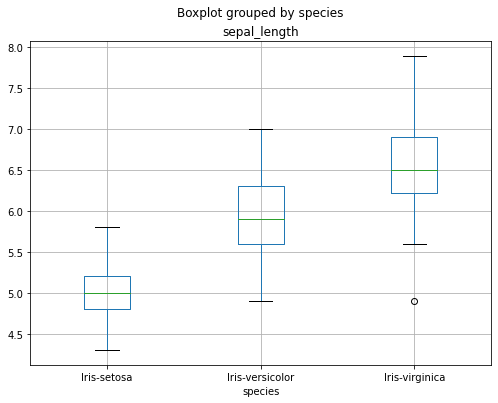

In [13]:
df.boxplot(column='sepal_length',by='species',figsize=[8,6])

<AxesSubplot:title={'center':'sepal_width'}, xlabel='species'>

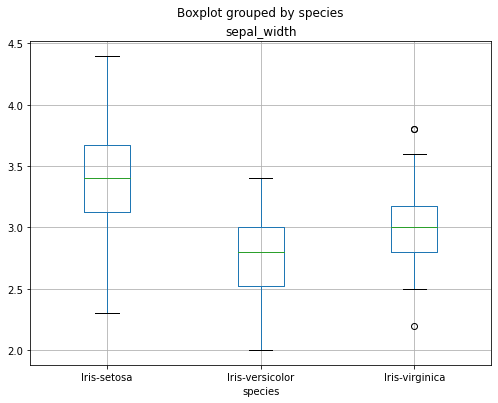

In [14]:
df.boxplot(column='sepal_width',by='species',figsize=[8,6])

<AxesSubplot:title={'center':'petal_length'}, xlabel='species'>

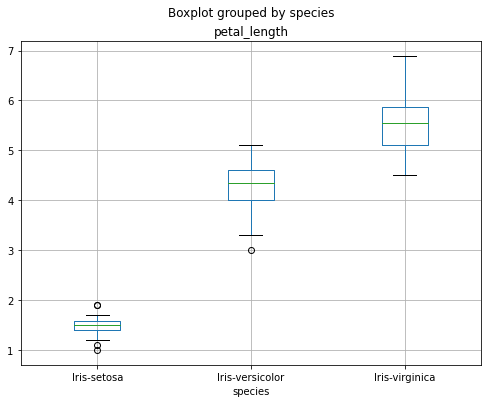

In [15]:
df.boxplot(column='petal_length',by='species',figsize=[8,6])

<AxesSubplot:title={'center':'petal_width'}, xlabel='species'>

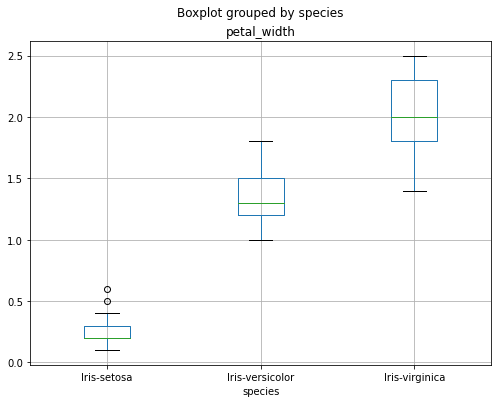

In [16]:
df.boxplot(column='petal_width',by='species',figsize=[8,6])

#From the above graphs, we can see that petal length and petal width have different distribution for iris-setosa.

#Rule 1: If petal length < 2 then target = Iris-setosa

In [17]:
data=df[df['species']=='Iris-virginica']
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


In [18]:
data=df[df['species']=='Iris-versicolor']
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


From above we can see the followings:

Petal Width : 75% of Virginica are greater than 1.8 whereas more than 50% of veriscolor are lesses than 1.4.

Petal Length : 75% of Virginica are greater than 5.1 whereas more than 50% of veriscolor are lesses than 4.5.
If petal length is less than 5.1 then 25% are virginica wheras almost all are veriscolor.


#Rule 2: If petal_width<1.4 then versicolor

#Rule 3: If petal_width>=1.8 then virginica

#Rule 4: If petal_length<5.1 then versicolor

#Rule 5: If petal_length>=5.1 then virginica

In [19]:
def predict_one(sepal_length, sepal_width, petal_length, petal_width):
    # print(sepal_length, sepal_width, petal_length, petal_width)
    if petal_length<2:
      return 'Iris-setosa'
    
    if petal_width<1.4:
      return 'Iris-versicolor'

    if petal_width>=1.8:
      return 'Iris-virginica'

    if petal_length<5.1:
      return 'Iris-versicolor'
    
    if petal_length>=5.1:
      return 'Iris-virginica'


In [20]:
predictions = pd.Series([ predict_one(*line) for line in df.iloc[:, :4].to_numpy()])
accuracy = sum(df.species == predictions) / len(df)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9733333333333334


We are getting accuracy of 97.33%